# Imports

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

# Fetch Data

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']


In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

**Plot a digit image**

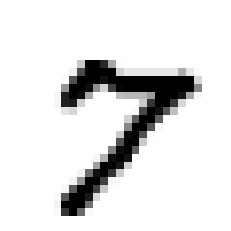

'7'

In [8]:
some_digit = x.to_numpy()[69000]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()
y[69000] #print the actual tagged label for 69000

# Spliting data

**For our convinience the MNIST dataset is already split. first 60000 are the training set and last 10000 are the testing sets**

In [9]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [10]:
y_train.shape

(60000,)

In [11]:
#Shuffle the index 
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.to_numpy()[shuffle_index], y_train.to_numpy()[shuffle_index]

In [15]:
# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 7)
y_test_2 = (y_test == 7)

# Train a model

In [16]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(tol=0.1)

In [17]:
example = clf.predict([some_digit])
print(example)

[ True]


In [19]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9837833333333332


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
y_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([ True, False, False, ..., False,  True, False])

**Confusion Matrix**

In [21]:
confusion_matrix(y_train_2, y_pred)

array([[53315,   420],
       [  553,  5712]])

**Precision Score**

In [22]:
precision_score(y_train_2, y_pred)

0.9315068493150684

**Recall Score**

In [23]:
recall_score(y_train_2, y_pred)

0.911731843575419

**F1 Score**

In [24]:
f1_score(y_train_2, y_pred)

0.9215132693393563

# Plot the Precision Recall Curve

In [25]:
y_score = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")
pre, recall, threshold = precision_recall_curve(y_train_2, y_score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


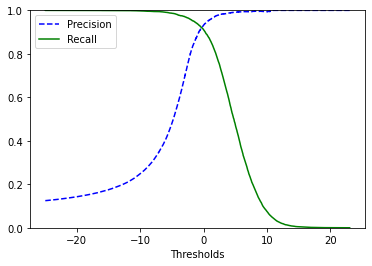

In [26]:
plt.plot(threshold, pre[:-1],"b--", label="Precision" )
plt.plot(threshold, recall[:-1],"g-", label="Recall" )
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [27]:
# SGD Classifier
clf_sgd = SGDClassifier(tol=0.1)
clf_sgd.fit(x_train,y_train_2)

SGDClassifier(tol=0.1)

In [28]:
example = clf_sgd.predict([some_digit])
print(example)

[ True]


In [29]:
a = cross_val_score(clf_sgd, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9583833333333334


In [30]:
y_pred_sgd = cross_val_predict(clf_sgd, x_train, y_train_2, cv=3)
y_pred_sgd

array([ True, False, False, ..., False,  True, False])

In [31]:
print(confusion_matrix(y_train_2, y_pred_sgd))
print("precision_score: ",precision_score(y_train_2, y_pred_sgd))
print("recall_score: ", recall_score(y_train_2, y_pred_sgd))
print("f1_score: ",f1_score(y_train_2, y_pred_sgd))

[[52911   824]
 [  636  5629]]
precision_score:  0.872307453897412
recall_score:  0.8984836392657621
f1_score:  0.8852020757980815


In [32]:
y_score_sgd = cross_val_predict(clf_sgd, x_train, y_train_2, cv=3, method="decision_function")
pre_sgd, recall_sgd, threshold_sgd = precision_recall_curve(y_train_2, y_score_sgd)

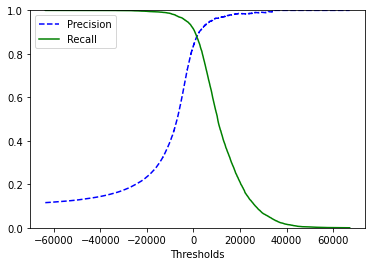

In [33]:
plt.plot(threshold_sgd, pre_sgd[:-1],"b--", label="Precision" )
plt.plot(threshold_sgd, recall_sgd[:-1],"g-", label="Recall" )
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

**Conclusion:**
When we used Logistic Regression we get 98.37 accuracy, precision, Recall is also high and 95.83 accuracy with SGDClassifier. 

**If you like my work, please Upvote
Thank you**